In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_records = pd.read_csv(
    "../logs/20240919-141324.csv",
    index_col=0,
)

df_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   epoch_time_seconds  8 non-null      float64
 1   train_avg_loss      8 non-null      float64
 2   eval_avg_loss       8 non-null      float64
 3   eval_accuracy       8 non-null      float64
dtypes: float64(4)
memory usage: 320.0 bytes


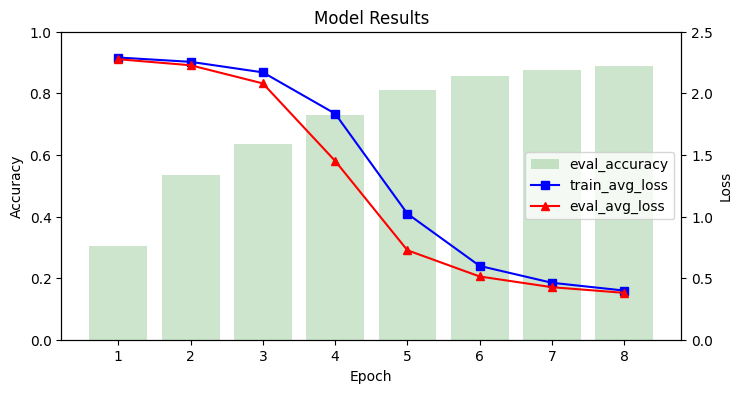

In [32]:
fig = plt.figure(figsize=(8, 4), dpi=100)
fig.set_facecolor("#fff")
ax_acc = fig.add_subplot()
ax_loss = ax_acc.twinx()

x = df_records.index.to_numpy() + 1

ax_loss.legend(
    handles=[
        ax_acc.bar(
            x,
            df_records["eval_accuracy"],
            color="green",
            alpha=0.2,
            label="eval_accuracy",
        ),
        *ax_loss.plot(
            x,
            df_records["train_avg_loss"],
            "bs-",
            label="train_avg_loss",
        ),
        *ax_loss.plot(
            x,
            df_records["eval_avg_loss"],
            "r^-",
            label="eval_avg_loss",
        ),
    ],
    loc="center right",
)

ax_acc.set(
    ylabel="Accuracy",
    title="Model Results",
    xlabel="Epoch",
    ylim=(0, 1),
)
ax_loss.set(
    ylabel="Loss",
    ylim=(0, 2.5),
)

pass